# EDA(Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-requisites of python for EDA 

**EDA : EDA is used to clean the data before feeding the data to the Machine learning algorithm for analysis**

## Handle Null Values

In [2]:
# create a list
name=["Rohit","Suraj","Tushar","Gopal","Ashwin"]
math=[89,78,67,np.nan,76]
science=[78,75,np.nan,np.nan,65]
# create dic
dict1={"Name":name,"Math":math,"Science":science}
df=pd.DataFrame(dict1)

In [3]:
df.head()

,Name,Math,Science
0,Rohit,89.0,78.0
1,Suraj,78.0,75.0
2,Tushar,67.0,NaN
3,Gopal,NaN,NaN
4,Ashwin,76.0,65.0


In [4]:
df.isnull().sum()
# 1 null in Math and 2 null in science

Name       0
Math       1
Science    2
dtype: int64

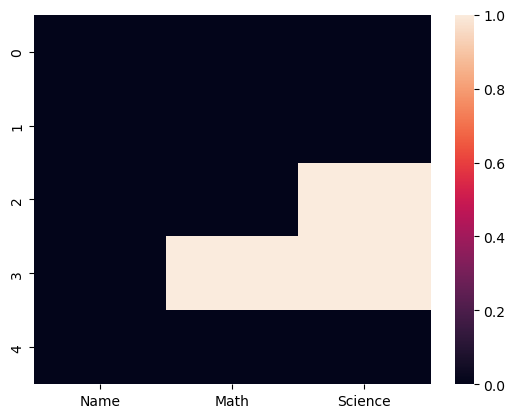

In [5]:
# Visualize null values
sns.heatmap(df.isnull())
plt.show()

In [6]:
# to drop all null values:
df.dropna(inplace=True)

In [7]:
df

,Name,Math,Science
0,Rohit,89.0,78.0
1,Suraj,78.0,75.0
4,Ashwin,76.0,65.0


## Now perform EDA for automobile dataset

In [8]:
auto=pd.read_csv("Automobile_data.csv")

In [9]:
auto.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [10]:
# so we can see that the data is impure "?" is involved

In [11]:
# check for null values
df.isnull().sum()

Name       0
Math       0
Science    0
dtype: int64

## so we can see that it is showing "0" nulls but we can see impurities present

In [12]:
# now check datatypes of all columns
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### normalized-losses:

In [28]:
# so now check what different values are present use unique function
auto["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [29]:
c=0
for i in auto["normalized-losses"]:
    if not (str(i).isnumeric()):
        c=c+1
        print(i)
print(c)        

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
41


In [30]:
# so now we have to replace "?" with null
auto["normalized-losses"].replace("?",np.nan,inplace=True)

In [31]:
# Now check for null
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [35]:
# so now we will change the datatype of column "normalized-losses" to float
auto["normalized-losses"]=auto["normalized-losses"].astype(float)

In [36]:
# so to check percentage null in column
(auto["normalized-losses"].isnull().sum()*100)/auto["normalized-losses"].size

20.0

***so now only 20% of data is null so we will fill the column "normalized-losses" with its mean***

In [37]:
# get the mean
m=auto["normalized-losses"].mean()
# now fill mean where there is null
auto["normalized-losses"].fillna(round(m,2),inplace=True)

***Now cross check for datatype and null***

In [38]:
auto["normalized-losses"].isnull().sum()

0

In [40]:
auto["normalized-losses"].dtype

dtype('float64')

# Now second method of EDA to check outliers

***First check outliers according to output only use boxplot***

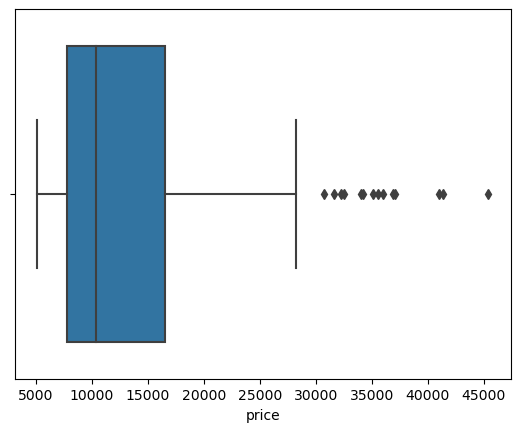

In [43]:
sns.boxplot(auto["price"])
plt.show()

***# Now we can't just make decisions based on the output and blindly delete all these records considering them as outliers. # We also need to check outliers with respect to input features because input also has effects on output and we should have domain knowledge to know which input feature is having major effect on the output. # In automobile industries we know that the company has major difference on the price.*** 

## so now considering output based on company name

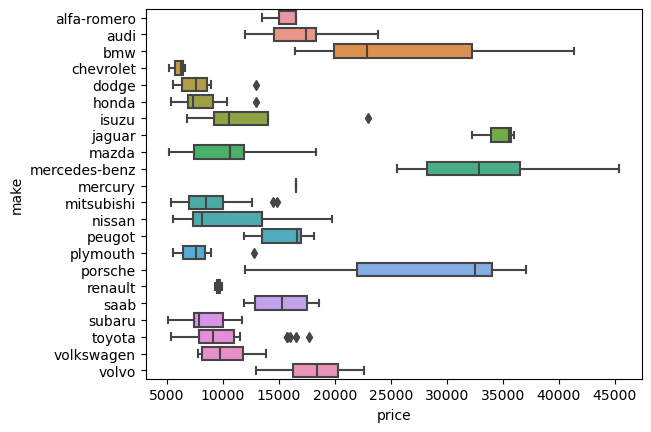

In [49]:
sns.boxplot(y=auto["make"],x=auto["price"])
plt.show()

In [50]:
# now we can see outliers in dodge,honda,isuzu,mitsubishi,plymouth,toyota

In [59]:
# now to find outlier use conditional fintering
auto[(auto["make"]=="dodge") & (auto["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [61]:
# so now delete outlier row 29 from dataframe
auto.drop(29,inplace=True)

In [63]:
# so outlier removed silmilary do for the other columns

## Handling Categorical Data

***we need to handle categorical object type data means convert object type data to numeric type for that we have two methods of conversion--------- 1. one hot encoding  2. LabelEncoder***

## one hot encoding
## what one hot encoding does is it makes 1 to all present value and 0 to that not present means
## for eg if we have gender male and female so it will create 2 columns male and female and for male column
## mark 1 to that rows where male and other all rows as 0, similarly for female mark 1 where female and 0 at remaining rows

In [65]:
# eg: one hot encoding

In [71]:
# create a dataframe
age=[23,21,15,18,19,20]
gender=["Male","Female","Female","Male","Male","Female"]
qua=["BCA","Graduate","Post-Graduate","Graduate","BCA","Post-Graduate"]
# create a dict
dict1={"age":age,"gender":gender,"qualification":qua}
# convert to dataframe
df5=pd.DataFrame(dict1)

In [72]:
df5

,age,gender,qualification
0,23,Male,BCA
1,21,Female,Graduate
2,15,Female,Post-Graduate
3,18,Male,Graduate
4,19,Male,BCA
5,20,Female,Post-Graduate


In [77]:
# apply one hot encoding
# get_dummies : inbuit method of one_hot_encoding in pandas
pd.get_dummies(df5["gender"])

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0


## LabelEncoder
***on other hand what labelencoder does is it gives unique values to all different category means for gender colummn it will mark Female - 0  and male - 1 . so compared to one hot encoding label encoder is much fast in processing so saves a lot of time***

In [78]:
# Now apply label encoder on gender column

***call inbuilt class LabelEncoder defined in inbuilt package preprocessing***

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
le=LabelEncoder()

In [83]:
# now apply labelEncoder
df5['gender']=le.fit_transform(df5["gender"]) #permanent change

In [86]:
df5   # 0-Female, 1-Male

,age,gender,qualification
0,23,1,BCA
1,21,0,Graduate
2,15,0,Post-Graduate
3,18,1,Graduate
4,19,1,BCA
5,20,0,Post-Graduate


## Appling label Encoder to automobile dataset

In [87]:
auto.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [104]:
auto.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

***Now apply labelEncoder to all the object type column***

***first seperate numeric and object type columns***

In [113]:
df_cat=auto.select_dtypes("object")
df_num=auto.select_dtypes(["int64","float64"])

In [118]:
for col in df_cat:
    le=LabelEncoder() # create object of LabelEncoder
    df_cat[col]=le.fit_transform(df_cat[[col]])
    #input always accepted as 2d thats why double [[]]

In [119]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [132]:
# let us check labels of "make" column
print(df_cat["make"].unique())
print(auto["make"].unique())
# 0- for alfa-romero ,2- for audi and so on

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


# Handling Skewness :-

In [133]:
# Let us consider an small example to understnad skewness(dummy data)
# create a dict
dic={'age':[4,5,6,6,6,7,7,7,7,7,7,8,8,8,9,10]}

# create dictionary to dataframe
df6=pd.DataFrame(dic)

In [134]:
df6

,age
0,4
1,5
2,6
3,6
4,6
5,7
6,7
7,7
8,7
9,7


In [135]:
df6.dtypes

age    int64
dtype: object

In [136]:
df6.value_counts()

age
7      6
6      3
8      3
4      1
5      1
9      1
10     1
dtype: int64

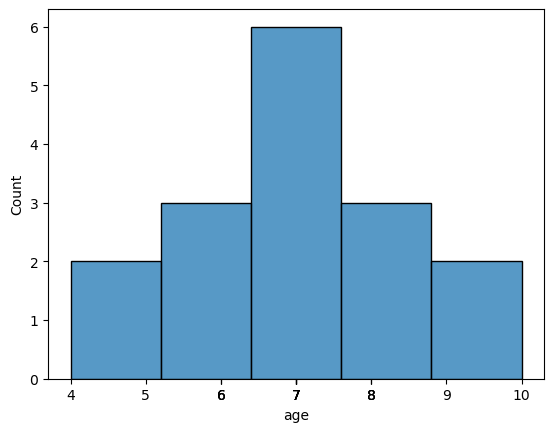

In [139]:
# for continuous numeric value to visualize frequency graph use histogrm
x=df6["age"]
sns.histplot(x)
plt.xticks(x)
plt.show()

In [143]:
mean=df6["age"].mean()
print("mean:",mean)
median=df6["age"].median()
print("median:",median)
mode=df6["age"].mode()
print("mode:",mode)

mean: 7.0
median: 7.0
mode: 0    7
Name: age, dtype: int64


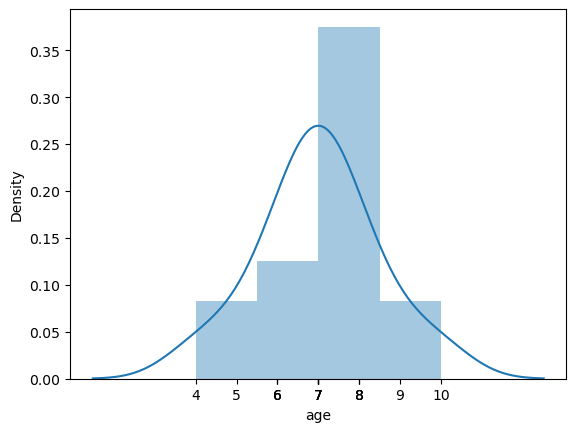

In [147]:
# to show bellshaped curve also in distribution use distplot
sns.distplot(df6["age"])
plt.xticks(df6["age"])
plt.show()

In [148]:
# check skewness
df6["age"].skew() #skew() inbuilt method of numpy

0.0

## check for skewness in automobile dataset

In [163]:
# we check skewness for onlu continuous numeric values
# so we have to check for continuous numeric coluns only which are in df_num
col=df_num.columns
col

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [158]:
# check skewness for all numeric columns
skeww=[]
for col in df_num:
    s=df_num[col].skew()
    skeww.append(s)
    print(f"skewness of {col} = {s}")

skewness of symboling = 0.21474950107949758
skewness of normalized-losses = 0.864950127117412
skewness of width = 0.9047299966389618
skewness of height = 0.05752450697096236
skewness of engine-size = 1.9586702992273624
skewness of horsepower = 1.415439471459341
skewness of city-mpg = 0.6567093626208058
skewness of highway-mpg = 0.5326740737705773
skewness of price = 1.8003511235343954


In [172]:
# correlation of all columns with output
corr=[]
for i in (df_num.corr()["price"]):
    corr.append(i)
print(corr)

[-0.08613973525115227, 0.1337174960748892, 0.7183443169055715, 0.13289073165041232, 0.8541395158570915, 0.7487464418157299, -0.6562314283702618, -0.6808247295363732, 1.0]


In [156]:
# check for negative values in all columns
for col in df_num:
    n=df_num[col].unique()
    print(f"{col} : {n}")

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : [122. 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 137. 101.  78.
 106.  85. 107. 145. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.  87.
  77.  91. 134.  65. 197.  90.  94. 256.  95.]
width : [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
height : [48.8 52.4 54.3 53.1 55.7 55.9 52.  53.7 56.3 53.2 50.8 50.6 59.8 52.6
 54.5 58.3 53.3 54.1 51.  53.5 51.4 52.8 47.8 49.6 55.5 54.4 56.5 58.7
 54.9 56.7 55.4 54.8 49.4 50.2 51.6 54.7 55.1 56.1 49.7 56.  50.5 55.2
 52.5 53.  59.1 53.9 55.6 56.2 57.5]
engine-size : [130 152 109 136 131 108 164 209  61  90  98 122  92  79 110 111 119 258
 326  91  70  80 140 134 183 234 308 304 156  97 103 120 181 151 194 203
 132 121 146 171 161 141 173 145]
ho

In [162]:
# so we can see that only symboling is having negative value 
neg=["yes","no","no","no","no","no","no","no","no"]

In [157]:
# check skewness for all numeric columns
skew=[]
for col in df_num:
    s=df_num[col].skew()
    skew.append(s)
    print(f"skewness of {col} = {s}")

skewness of symboling = 0.21474950107949758
skewness of normalized-losses = 0.864950127117412
skewness of width = 0.9047299966389618
skewness of height = 0.05752450697096236
skewness of engine-size = 1.9586702992273624
skewness of horsepower = 1.415439471459341
skewness of city-mpg = 0.6567093626208058
skewness of highway-mpg = 0.5326740737705773
skewness of price = 1.8003511235343954


In [173]:
# create a datframe to view everything together
dict={"column":col,"skewness":skeww,"negative":neg,"correlation":corr}
skew_rule=pd.DataFrame(dict)
skew_rule

,column,skewness,negative,correlation
0,symboling,0.214750,yes,-0.086140
1,normalized-losses,0.864950,no,0.133717
2,width,0.904730,no,0.718344
3,height,0.057525,no,0.132891
4,engine-size,1.958670,no,0.854140
5,horsepower,1.415439,no,0.748746
6,city-mpg,0.656709,no,-0.656231
7,highway-mpg,0.532674,no,-0.680825
8,price,1.800351,no,1.000000


## Applying transformation on normalized-losses column

In [180]:
# because only normalized-losses is having skewness and no negative present 
# and correlation <0.5
df_num["normalized-losses"]=np.log(df_num["normalized-losses"])

In [181]:
# Now we can check that the skewness has been reduced
df_num["normalized-losses"].skew()

0.04104710005254059

In [182]:
#---------------------------------------------------------------------------------------------------------------------

In [184]:
## Now merge both numeric and categorical columns
auto_new=pd.concat([df_cat,df_num],axis=1)
auto_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,4.804021,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,4.804021,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,5.099866,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,5.099866,66.4,54.3,136,115.0,18,22,17450


In [185]:
#----------------------------------------------------------------------------------------------------------------------

# scaling

In [186]:
# call inbuilt class StandardScaler defined in preprocessing class
from sklearn.preprocessing import StandardScaler
# create a object of StandardScaler class
ss=StandardScaler()

In [187]:
# selct input output
x=auto_new.drop("price",axis=1)
y=auto_new["price"]

In [190]:
from sklearn.model_selection import train_test_split
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [191]:
# Apply StandardScaler 
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [193]:
x_train 

array([[ 1.19543463, -2.90975371,  0.51098067, ..., -1.32573441,
         2.02051841,  2.40880296],
       [ 1.03663976,  0.3436717 ,  0.51098067, ..., -0.89152689,
         0.54411902,  0.56817505],
       [ 1.3542295 ,  0.3436717 ,  0.51098067, ...,  0.16986925,
        -0.11205848, -0.35213891],
       ...,
       [-0.55130896,  0.3436717 ,  0.51098067, ...,  1.85845402,
        -1.75250225, -2.19276682],
       [ 0.87784489,  0.3436717 ,  0.51098067, ..., -0.60205522,
         1.20029653,  1.02833203],
       [-1.18648844,  0.3436717 , -0.64075354, ..., -0.50556466,
         0.38007465,  0.41478939]])